DT with more observations

In [45]:
import pandas as pd

In [46]:
df= pd.read_csv("/Users/tanjamarkotic/Desktop/DMML2019_Team_Swatch/data/DataWithLocationCleaned.csv.gz")

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [48]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,6,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,6,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,6,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,6,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,6,"(48.905266, -95.314404)"


In [49]:
# checking types
df.dtypes

Port Name    object
State        object
Port Code     int64
Border       object
Date         object
Measure      object
Value         int64
Year          int64
Month         int64
position     object
dtype: object

In [50]:
df = df[df['Measure'].isin(['Bus Passengers','Pedestrians','Personal Vehicle Passengers','Train Passengers'])]
df = df.reset_index(drop=True)
df.shape

(116131, 10)

In [51]:
df.shape

(116131, 10)

In [52]:
total = df.copy()

In [53]:
total['quant'] = pd.qcut(df['Value'],q = 8, duplicates = 'drop')
print("intervalls for y:")
print(total['quant'].value_counts())
print()
le = LabelEncoder()
total['y'] = le.fit_transform(total["quant"])

intervalls for y:
(-0.001, 11.0]          43673
(62918.0, 4447374.0]    14516
(6943.0, 62918.0]       14516
(1193.0, 6943.0]        14516
(156.0, 1193.0]         14503
(11.0, 156.0]           14407
Name: quant, dtype: int64



In [54]:
#other option to get balanced classes by removing half of the observation in first interval
total = total.drop(total[total['y'] == 0].sample(frac=.67).index)

In [55]:
total.shape

(86870, 12)

In [56]:
total['quant'].value_counts()

(62918.0, 4447374.0]    14516
(6943.0, 62918.0]       14516
(1193.0, 6943.0]        14516
(156.0, 1193.0]         14503
(-0.001, 11.0]          14412
(11.0, 156.0]           14407
Name: quant, dtype: int64

In [57]:
# check categories...
total.sort_values(['Value'],ascending=False).head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position,quant,y
90369,El Paso,Texas,2402,US-Mexico Border,2001-03-01,Personal Vehicle Passengers,4447374,2001,3,"(31.7600372, -106.487287)","(62918.0, 4447374.0]",5
93325,El Paso,Texas,2402,US-Mexico Border,2000-08-01,Personal Vehicle Passengers,4291774,2000,8,"(31.7600372, -106.487287)","(62918.0, 4447374.0]",5
90890,El Paso,Texas,2402,US-Mexico Border,2001-02-01,Personal Vehicle Passengers,4281175,2001,2,"(31.7600372, -106.487287)","(62918.0, 4447374.0]",5
90034,El Paso,Texas,2402,US-Mexico Border,2001-04-01,Personal Vehicle Passengers,4252128,2001,4,"(31.7600372, -106.487287)","(62918.0, 4447374.0]",5
93966,El Paso,Texas,2402,US-Mexico Border,2000-06-01,Personal Vehicle Passengers,4235244,2000,6,"(31.7600372, -106.487287)","(62918.0, 4447374.0]",5


In [73]:
total = total.reset_index()
total.head()

,index,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position,quant,y
0,0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,6,"(48.905266, -95.314404)","(6943.0, 62918.0]",4
1,2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Bus Passengers,63,2019,6,"(48.905266, -95.314404)","(11.0, 156.0]",1
2,3,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Personal Vehicle Passengers,7385,2019,6,"(48.7710371, -95.7697882)","(6943.0, 62918.0]",4
3,4,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Bus Passengers,118,2019,6,"(48.7710371, -95.7697882)","(11.0, 156.0]",1
4,5,Detroit,Michigan,3801,US-Canada Border,2019-06-01,Personal Vehicle Passengers,599521,2019,6,"(42.3315509, -83.0466403)","(62918.0, 4447374.0]",5


In [74]:
#features but possibly add lat, long, measure
X = total[["Year","Month", "Port Code"]]
y = total["y"]
X.shape

(86870, 3)

In [75]:
X.isnull().sum()

Year         0
Month        0
Port Code    0
dtype: int64

In [76]:
y.isnull().sum()

0

In [77]:
X.head()

,Year,Month,Port Code
0,2019,6,3423
1,2019,6,3423
2,2019,6,3426
3,2019,6,3426
4,2019,6,3801


In [78]:
y = y.astype('int')
y.head()

0    4
1    1
2    4
3    1
4    5
Name: y, dtype: int64

In [79]:
# one-hot encoding for Border
one_hot = OneHotEncoder(categories="auto")
cat_to_onehot = one_hot.fit_transform(total[["Border"]]).toarray()
cat_to_onehot = pd.DataFrame(cat_to_onehot)
cat_to_onehot.shape

(86870, 2)

In [80]:
X = pd.concat((X, cat_to_onehot), axis=1, join='inner')

X.shape

(86870, 5)

In [81]:
X.isnull().sum()

Year         0
Month        0
Port Code    0
0            0
1            0
dtype: int64

In [82]:
X = X.rename(columns={0: "Canada Border", 1: "Mexico Border"})
X.head()

,Year,Month,Port Code,Canada Border,Mexico Border
0,2019,6,3423,1.0,0.0
1,2019,6,3423,1.0,0.0
2,2019,6,3426,1.0,0.0
3,2019,6,3426,1.0,0.0
4,2019,6,3801,1.0,0.0


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [84]:
clf = DecisionTreeClassifier(criterion='entropy')

In [85]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
# test accuracy
clf.score(X_test,y_test)

0.19022677564176355

In [87]:
# depth of the decision tree
clf.get_depth()

30

In [88]:
scores = []
for d in range(1, 21):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

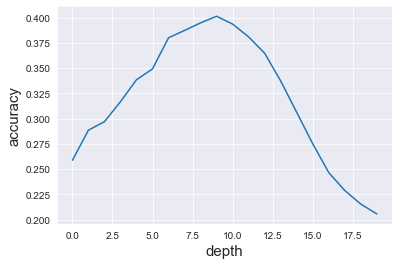

In [89]:
plt.plot(scores)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [90]:
# best depth
np.argmax(scores)

9

In [91]:
# feature importances for best classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)
clf.feature_importances_

array([0.0082885 , 0.        , 0.56680311, 0.42490839, 0.        ])

In [92]:
sorted(zip(X_train.columns, clf.feature_importances_), key=lambda x: x[1], reverse=True)

[('Port Code', 0.5668031092306279),
 ('Canada Border', 0.42490839298599115),
 ('Year', 0.008288497783380876),
 ('Month', 0.0),
 ('Mexico Border', 0.0)]

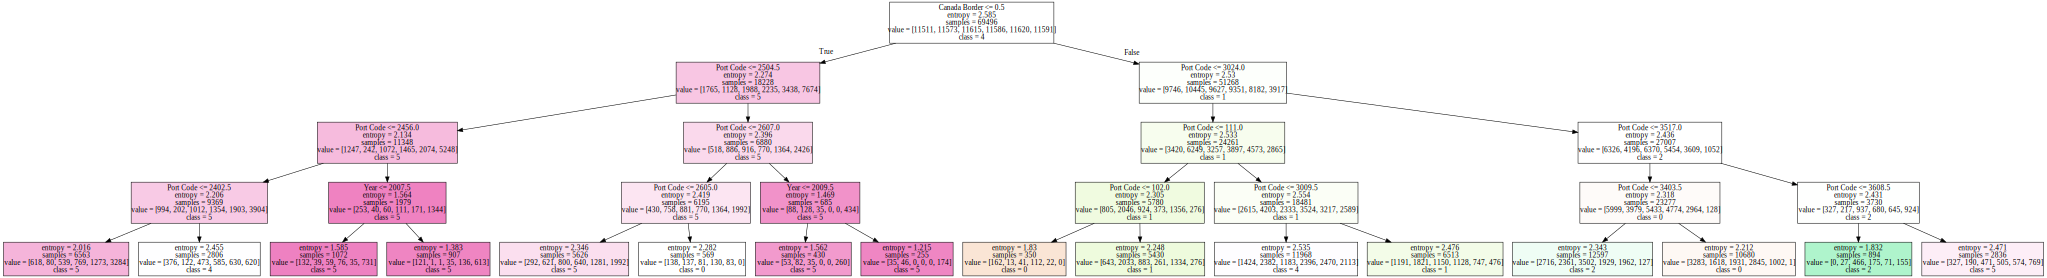

In [93]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(export_graphviz(clf, out_file=None
   , feature_names=X_train.columns, class_names=['0','1','2','3','4','5','6','7'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

No handles with labels found to put in legend.


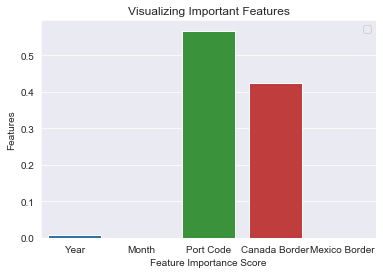

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=X_train.columns, y=clf.feature_importances_)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()